<a href="https://colab.research.google.com/github/cxbxmxcx/EvolutionaryDeepLearning/blob/main/EDL_8_2_Evo_Autoencoder_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and other setup

In [ ]:
import numpy as np
import tensorflow as tf
import numpy as np
import random

from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.callbacks import EarlyStopping

from IPython import display
from IPython.display import clear_output
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
plt.gray()

<Figure size 432x288 with 0 Axes>

CONSTANTS

Load Fashion Data

In [ ]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# split dataset
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype("float32") / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype("float32") / 255.0

4431872/4422102 [==============================] - 0s 0us/step


Setup class names and labels for visualization, not training

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Plot some images.

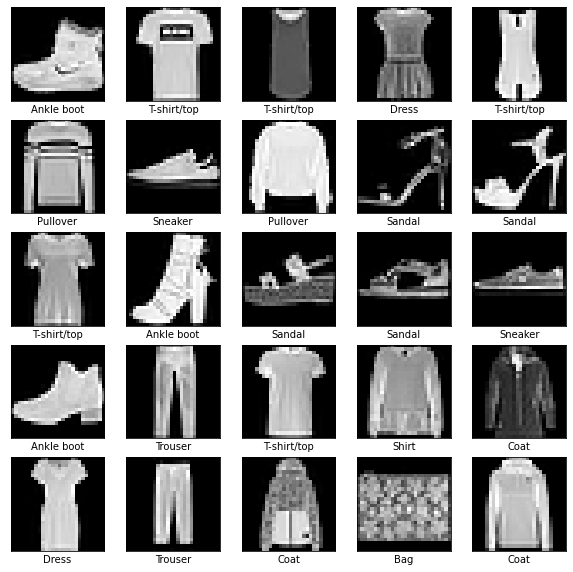

In [ ]:
import math

def plot_data(num_images, images, labels):
  grid = math.ceil(math.sqrt(num_images))
  plt.figure(figsize=(grid*2,grid*2))
  for i in range(num_images):
      plt.subplot(grid,grid,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)     
      plt.imshow(images[i].reshape(28,28))
      plt.xlabel(class_names[labels[i]])      
  plt.show()

plot_data(25, train_images, train_labels)


STAGE 1: Auto-encoders

Build the Encoder

In [ ]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = layers.MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = layers.MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = layers.MaxPool2D( (2, 2), padding='same')(encoded_layer3)

Build the Decoder

In [ ]:
#decoding architecture
decoded_layer1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = layers.UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = layers.UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = layers.Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = layers.UpSampling2D((2, 2))(decoded_layer3)
#output layer
output_layer   = layers.Conv2D(1, (3, 3), padding='same')(decoded_layer3)

Build the Model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624  

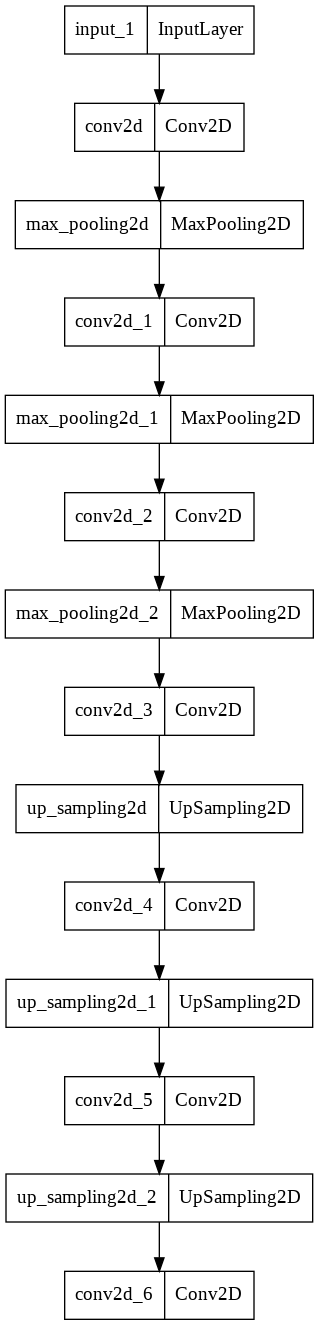

In [ ]:
# compile the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model)

In [ ]:
history_loss = []
history_val_loss = []

def add_history(history):
  history_loss.append(history.history["loss"])
  history_val_loss.append(history.history["val_loss"])

def reset_history():
  global history_loss
  global history_val_loss
  history_loss = []
  history_val_loss = []
  return []

def plot_results(num_images, images, labels, history):
  add_history(history)
  grid = math.ceil(math.sqrt(num_images))
  plt.figure(figsize=(grid*2,grid*2))
  for i in range(num_images):
      plt.subplot(grid,grid,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)     
      plt.imshow(images[i].reshape(28,28))
      plt.xlabel(class_names[labels[i]])      
  plt.show()
  plt.plot(history_loss, label='loss')
  plt.plot(history_val_loss, label='val_loss')
  plt.legend()
  plt.show()  

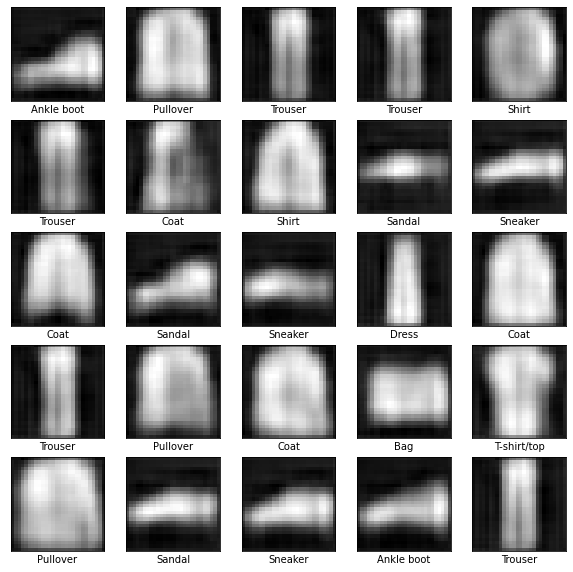

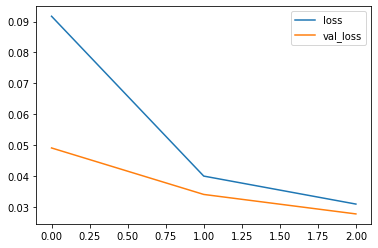

In [ ]:
EPOCHS = 3
history = reset_history()

for i in range(EPOCHS):
  history = model.fit(train_images, train_images, epochs=1, batch_size=2048, validation_data=(test_images, test_images))
  pred_images = model.predict(test_images[:25])
  clear_output()
  plot_results(25, pred_images[:25], test_labels[:25], history)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 16)          4624

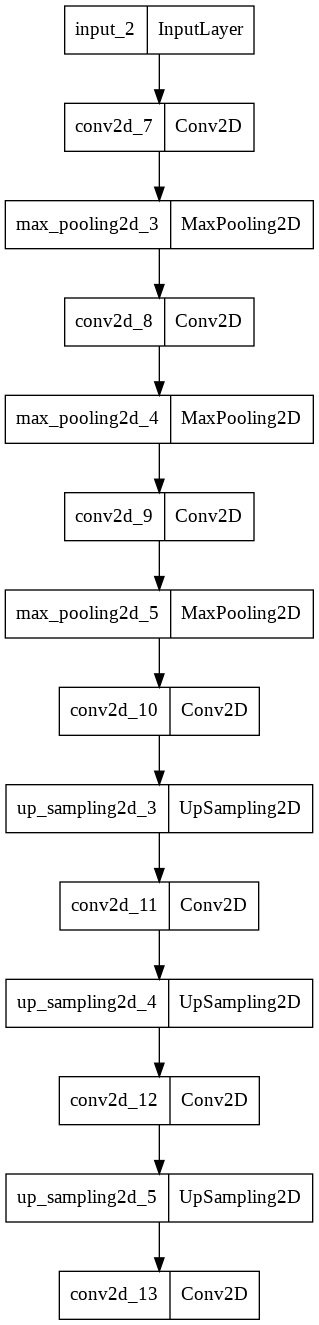

In [ ]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
#x = layers.BatchNormalization()(x)
x = layers.MaxPool2D( (2, 2), padding='same')(x)
#x = layers.Dropout(0.5)(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.MaxPool2D( (2, 2), padding='same')(x)
#x = layers.Dropout(0.5)(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.MaxPool2D( (2, 2), padding='same')(x)
#x = layers.Dropout(0.5)(x)

#decoding architecture
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = layers.Dropout(0.5)(x)
x = layers.UpSampling2D((2, 2))(x)
#x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#x = layers.Dropout(0.5)(x)
x = layers.UpSampling2D((2, 2))(x)
#x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
#x = layers.Dropout(0.5)(x)
x = layers.UpSampling2D((2, 2))(x)
#x = layers.BatchNormalization()(x)
#output layer
output_layer   = layers.Conv2D(1, (3, 3), padding='same')(x)

# compile the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model)

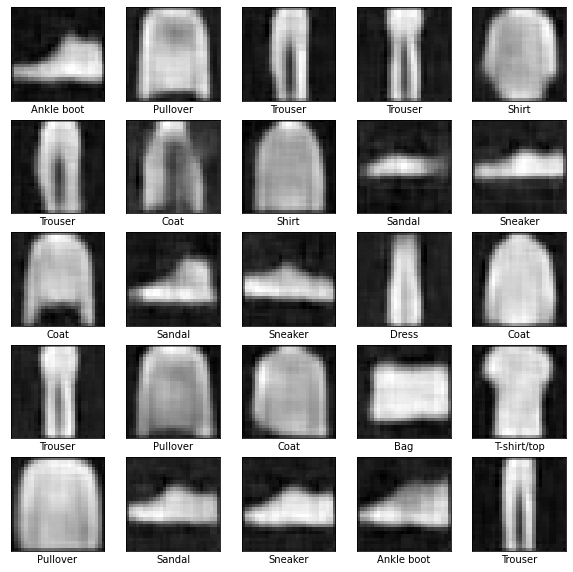

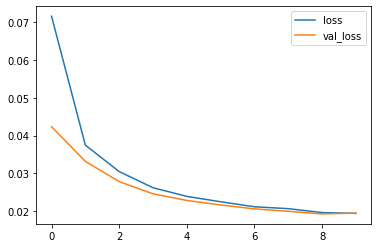

In [ ]:
EPOCHS = 10
history = reset_history()

for i in range(EPOCHS):
  history = model.fit(train_images, train_images, epochs=1, batch_size=2048, validation_data=(test_images, test_images))
  pred_images = model.predict(test_images[:25])
  clear_output()
  plot_results(25, pred_images[:25], test_labels[:25], history)

# Encoding an Autoencoder

In [ ]:
#@title Constants
max_layers = 10
max_neurons = 128
min_neurons = 16
max_kernel = 3
min_kernel = 3
max_pool = 2
min_pool = 2

CONV_LAYER = -1
CONV_LAYER_LEN = 4
BN_LAYER = -3
BN_LAYER_LEN = 1
DROPOUT_LAYER = -4
DROPOUT_LAYER_LEN = 2
UPCONV_LAYER = -2
UPCONV_LAYER_LEN = 4

In [ ]:
#@title Encoding scheme
def generate_neurons():
  return random.randint(min_neurons, max_neurons)

def generate_kernel():
  part = []
  part.append(random.randint(min_kernel, max_kernel))
  part.append(random.randint(min_kernel, max_kernel))
  return part

def generate_bn_layer():
  part = [BN_LAYER] 
  return part

def generate_dropout_layer():
  part = [DROPOUT_LAYER] 
  part.append(random.uniform(0,.5))  
  return part

def generate_conv_layer():
  part = [CONV_LAYER] 
  part.append(generate_neurons())
  part.extend(generate_kernel())  
  return part

def generate_upconv_layer():
  part = [UPCONV_LAYER] 
  part.append(generate_neurons())
  part.extend(generate_kernel())  
  return part

def create_offspring():
  ind = []
  layers = 0
  for i in range(max_layers):
    if i==0: #first layer always convolutational
      ind.extend(generate_conv_layer())      
      layers += 1
    elif random.uniform(0,1)<.5:
      #add convolution layer
      ind.extend(generate_conv_layer())
      layers += 1
      if random.uniform(0,1)<.5:
        #add batchnormalization
        ind.extend(generate_bn_layer())
      if random.uniform(0,1) < .5:
        ind.extend(generate_dropout_layer()) 
  for i in range(layers):
    ind.extend(generate_upconv_layer())
    if random.uniform(0,1)<.5:
      #add batchnormalization
      ind.extend(generate_bn_layer())
    if random.uniform(0,1) < .5:
      ind.extend(generate_dropout_layer())
  return ind
        
individual = create_offspring()
print(individual)

[-1, 119, 3, 3, -1, 124, 3, 3, -3, -1, 51, 3, 3, -3, -4, 0.18115040551907158, -1, 100, 3, 3, -3, -1, 53, 3, 3, -4, 0.3851574338900918, -2, 18, 3, 3, -3, -4, 0.40855755989906395, -2, 80, 3, 3, -4, 0.25008197591890513, -2, 50, 3, 3, -4, 0.027526791233426384, -2, 49, 3, 3, -2, 71, 3, 3, -3, -4, 0.33494244413404256]


In [ ]:
def padding(gene):
  return "same" if gene == 1 else "valid"

def build_model(individual):
  input_layer = Input(shape=(28, 28, 1))  
  il = len(individual)
  i = 0
  x = input_layer
  while i < il:    
    if individual[i] == CONV_LAYER:      
      pad="same" 
      n = individual[i+1]
      k = (individual[i+2], individual[i+3])
      i += CONV_LAYER_LEN        
      x = layers.Conv2D(n, k, activation='relu', padding=pad)(x) 
      if x.shape[1] > 7:
        x = layers.MaxPool2D( (2, 2), padding='same')(x)
    elif individual[i] == BN_LAYER: #add batchnormal layer
      x = layers.BatchNormalization()(x)
      i += BN_LAYER_LEN      
    elif individual[i] == DROPOUT_LAYER: #add dropout layer            
      x = layers.Dropout(individual[i+1])(x) 
      i += DROPOUT_LAYER_LEN
    elif individual[i] == UPCONV_LAYER:
      pad="same"
      n = individual[i+1]
      k = (individual[i+2], individual[i+3])        
      x = layers.Conv2D(n, k, activation='relu', padding=pad)(x)   
      x = layers.UpSampling2D((2, 2))(x)   
      i += CONV_LAYER_LEN   
      if x.shape[1] == (28):
        break #model is complete
    else:
      break
  if x.shape[1] == 14:
    x = layers.UpSampling2D((2, 2))(x)
    
  output_layer = layers.Conv2D(1, (3, 3), padding='same')(x)
  model = Model(input_layer, output_layer)
  model.compile(optimizer='adam', loss='mse')
  return model

model = build_model(individual) 
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 119)       1190      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 119)      0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 124)       132928    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 124)        0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 124)        496 

In [ ]:
max_model = None
min_model = None
maxp = 0
minp = 10000000

for i in range(100):
  individual = create_offspring() 
  model = build_model(individual)
  p = model.count_params() 
  if p > maxp:
    maxp = p
    max_model = model
  if p < minp:
    minp = p
    min_model = model 
  
max_model.summary(line_length=100)
min_model.summary(line_length=100)

Model: "model_338"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_339 (InputLayer)                      [(None, 28, 28, 1)]                     0              
                                                                                                    
 conv2d_2890 (Conv2D)                        (None, 28, 28, 85)                      850            
                                                                                                    
 max_pooling2d_677 (MaxPooling2D)            (None, 14, 14, 85)                      0              
                                                                                                    
 conv2d_2891 (Conv2D)                        (None, 14, 14, 121)                     92686          
                                                                        

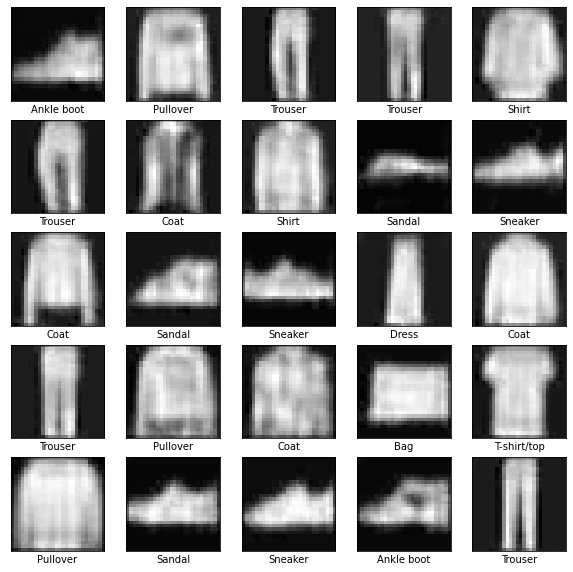

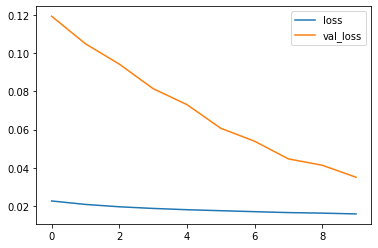

In [ ]:
EPOCHS = 10
history = reset_history()

#model = max_model
model = min_model

for i in range(EPOCHS):
  history = model.fit(train_images, train_images, epochs=1, batch_size=2048, validation_data=(test_images, test_images))
  pred_images = model.predict(test_images[:25])
  clear_output()
  plot_results(25, pred_images[:25], test_labels[:25], history)